Load CSV File Pandas and NumPy

In [137]:
import numpy as numpy # linear algebra
import pandas as pandas # data processing, CSV file I/O (e.g. pd.read_csv)

# For visualizing
import matplotlib.pyplot as plt
import seaborn as sns

# For ignoring warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

data = pd.read_csv('heart.csv')

Dipslay Data

In [97]:
display(data)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Cleaning Data:

Correcting the Data Types

In [138]:
# Renaming the columns
renamed_columns = ['age', 'gender', 'chest pain type', 'resting blood pressure', 'cholesterol', 
                   'fasting blood sugar', 'rest ecg', 'max heart rate achieved','exercise induced angina',
                   'st depression', 'st slope', 'Heart Disease']
data.columns = renamed_columns

# Correcting the data types
categorical_columns = ['gender', 'chest pain type', 'fasting blood sugar', 'rest ecg',
                       'exercise induced angina', 'st slope']
data[categorical_columns] = data[categorical_columns].astype('object')
data['rest ecg'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

Removing the unecessary columns or values

In [139]:
# Also renaming the values in the catergorical features
data['gender'].replace({'F':'female','M':'male'}, inplace=True)

data['chest pain type'].replace({'TA':'typical angina','ATA':'atypical angina','NAP':'non-anginal pain','ASY':'asymptomatic'}, inplace=True)

data['fasting blood sugar'].replace({0:'lower than 120mg/ml',1:'greater than 120mg/ml'}, inplace=True)

#data['rest ecg'].replace({0:'normal',1:'ST-T wave abnormality'}, inplace=True)

data['exercise induced angina'].replace({0:'no',1:'yes'}, inplace=True)

Handling Missing Values

In [140]:
data.isnull().sum()

age                        0
gender                     0
chest pain type            0
resting blood pressure     0
cholesterol                0
fasting blood sugar        0
rest ecg                   0
max heart rate achieved    0
exercise induced angina    0
st depression              0
st slope                   0
Heart Disease              0
dtype: int64

In [141]:
#there are no missing values

Removing Outliers

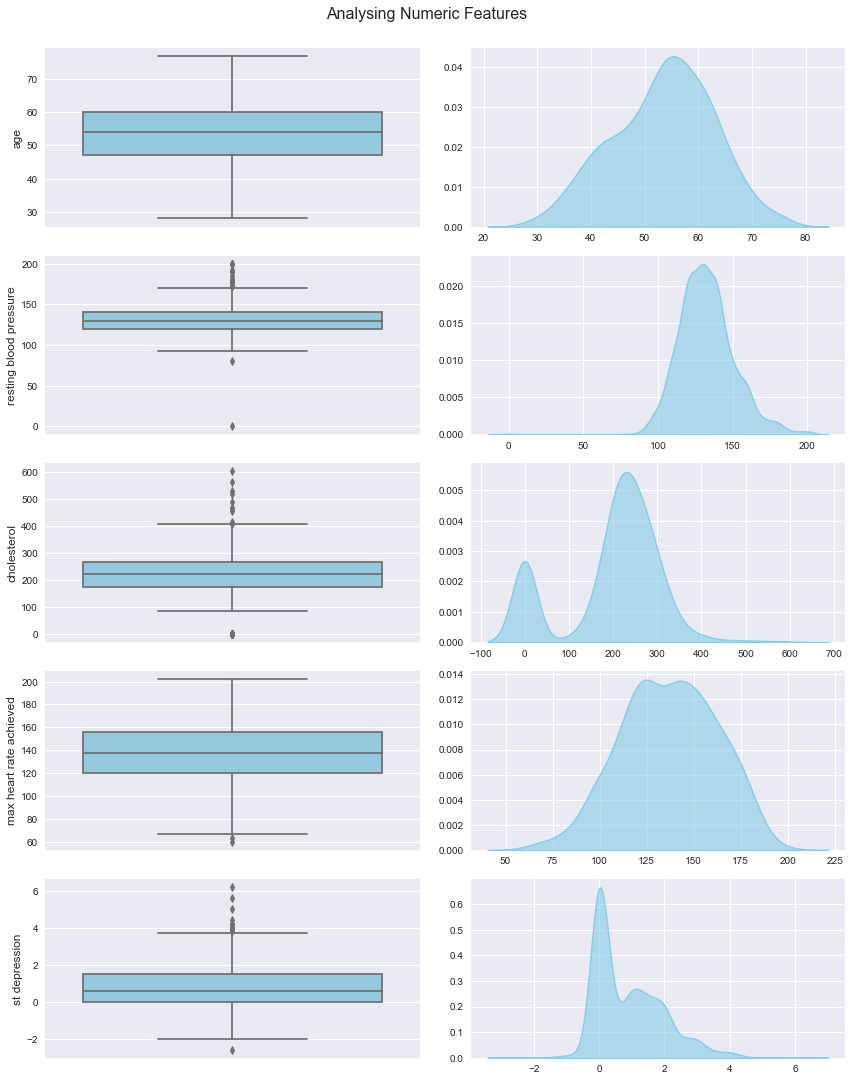

In [142]:
# Let's look at the outliers and the distribution of the numeric features
numeric_variables = [i for i in data.select_dtypes(['int','float']).columns[:-1]]
plt.style.use('seaborn')
fig, axis = plt.subplots(5, 2, figsize = (12, 15))
for i, num_var in enumerate(numeric_variables):
    
    # Checking for the outliers using boxplot
    sns.boxplot(y = num_var, data = data, ax = axis[i][0], color = 'skyblue')
    
    # Checking for the distribution using kdeplot
    sns.kdeplot(x = num_var, data = data, ax = axis[i][1], color = 'skyblue',
               fill = True, alpha = 0.6, linewidth = 1.5)
    
    axis[i][0].set_ylabel(f"{num_var}", fontsize = 12)
    axis[i][0].set_xlabel(None)
    axis[i][1].set_xlabel(None)
    axis[i][1].set_ylabel(None)

fig.suptitle('Analysing Numeric Features', fontsize = 16, y = 1)
plt.tight_layout()

In [143]:
#a person may have very high cholesterol, like >500 mg/dl but can't have 0 cholestrol, a rest blood pressure of >180 mm of Hg but not 0 and a ST depression >5
# Removing samples with extreme values
data = data[(data['resting blood pressure']<=180)&(data['resting blood pressure']>0)]
data = data[(data['cholesterol']<=500)&(data['cholesterol']>0)]
data = data[data['st depression']<=5]

Class Imbalance Measure

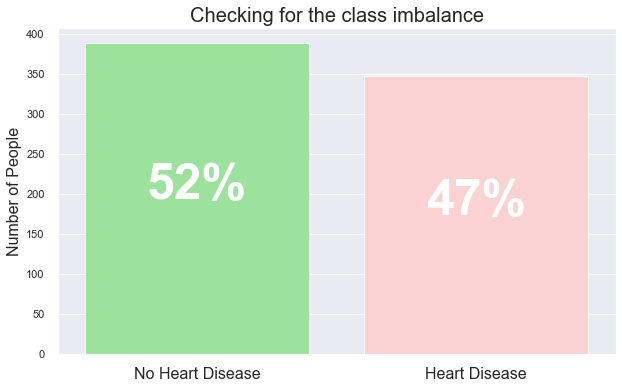

In [144]:
# Checking for class imbalance
colors = ['#90EE90', '#ffcccb']
sns.set(palette = colors)

fig = plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Heart Disease', data = data)

for i in ax.patches:
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2, 
            s = f"{int(i.get_height()/len(data)*100)}%", 
            ha = 'center', size = 50, weight = 'bold', rotation = 0, color = 'white')

plt.title("Checking for the class imbalance", size = 20)

ax.set_xticklabels(['No Heart Disease', 'Heart Disease'], fontsize=16)
plt.xlabel('', fontsize = 16)
plt.ylabel('Number of People', fontsize = 16);

One Hot Encoding (Change categorical data to numerical data)

In [145]:
# One hot encoding - Converting categorical features into encoded form of 0 and 1
data_encoded = pd.get_dummies(data, drop_first = True)
data_encoded.head()

,age,resting blood pressure,cholesterol,max heart rate achieved,st depression,Heart Disease,gender_male,chest pain type_atypical angina,chest pain type_non-anginal pain,chest pain type_typical angina,fasting blood sugar_lower than 120mg/ml,rest ecg_Normal,rest ecg_ST,exercise induced angina_Y,st slope_Flat,st slope_Up
0,40,140,289,172,0.0,0,1,1,0,0,1,1,0,0,0,1
1,49,160,180,156,1.0,1,0,0,1,0,1,1,0,0,1,0
2,37,130,283,98,0.0,0,1,1,0,0,1,0,1,0,0,1
3,48,138,214,108,1.5,1,0,0,0,0,1,1,0,1,1,0
4,54,150,195,122,0.0,0,1,0,1,0,1,1,0,0,0,1


Train and Test Split

In [146]:
from sklearn.model_selection import train_test_split

X = data_encoded.copy()
y = X.pop('Heart Disease')

# Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size=0.8, stratify = y) # 80% training 20% testing data

In [147]:
# Checking for the class proprtion in train and test set
print('Class proportion in train set: \n',y_train.value_counts()/y_train.value_counts().sum())
print('-'*50)
print('Class proportion in test set: \n',y_test.value_counts()/y_test.value_counts().sum())

Class proportion in train set: 
 0    0.527211
1    0.472789
Name: Heart Disease, dtype: float64
--------------------------------------------------
Class proportion in test set: 
 0    0.530612
1    0.469388
Name: Heart Disease, dtype: float64


Scaling Data

In [148]:
from sklearn.preprocessing import StandardScaler

# Scaling the numeric features
scalar = StandardScaler()

X_train_scaled = pd.DataFrame(scalar.fit_transform(X_train[numeric_variables]), columns = numeric_variables)
X_test_scaled = pd.DataFrame(scalar.transform(X_test[numeric_variables]), columns = numeric_variables)

X_train_final = pd.concat([X_train_scaled.reset_index(drop=True), X_train.iloc[:,5:].reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test_scaled.reset_index(drop=True), X_test.iloc[:,5:].reset_index(drop=True)], axis=1)

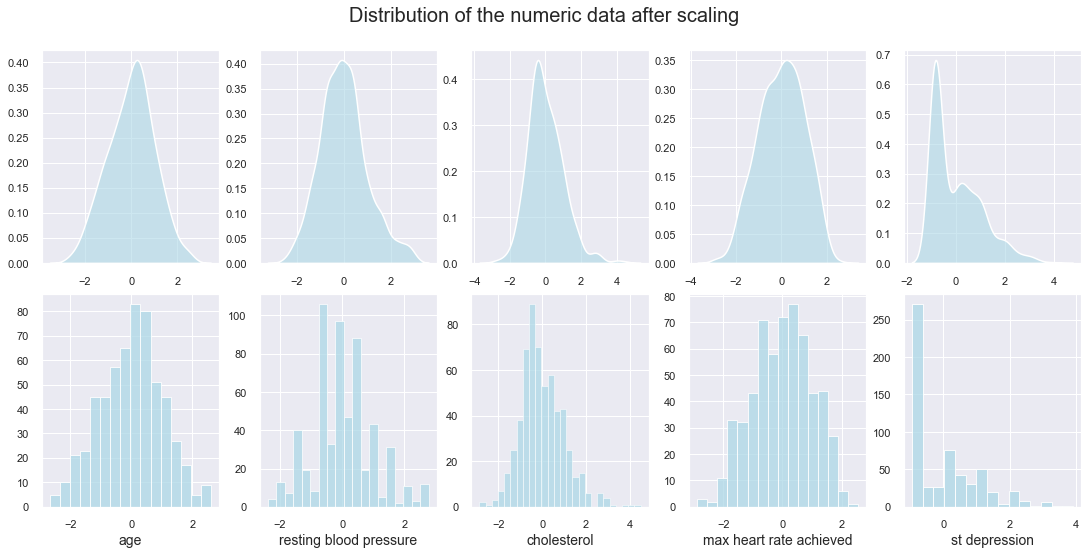

In [149]:
# Checking the distribution of the numeric data after scaling
colors = ['#ADD8E6']
sns.set(palette = colors)
fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (15, 7), constrained_layout = True)

for axis, num_var in zip(ax.ravel(), numeric_variables): 
    sns.kdeplot(data = X_train_final, x = num_var, ax = axis,
                fill = True, multiple = 'stack', alpha = 0.6, linewidth = 1.5)
    axis.set_ylabel(None)
    axis.set_xlabel(None)

for i, num_var in zip(range(0, 5), numeric_variables): 
    sns.histplot(data = X_train_final, x = num_var, ax = ax[1][i])
    ax[1][i].set_ylabel(None)
    ax[1][i].set_xlabel(f'{num_var}', fontsize = 14)
    
fig.text(0.5, 1.05, 'Distribution of the numeric data after scaling', ha = 'center', fontsize = 20);

Machine Learning:

Decision Tree Without Scaled Data

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()
parameters = {'max_depth':[3,5,7], 'min_samples_leaf':[5,10,15]}

tree_clf = GridSearchCV(tree, parameters, cv=5)
tree_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15]})

In [111]:
from sklearn.metrics import roc_auc_score

print('Train AUC-ROC score is', roc_auc_score(y_train, tree_clf.predict_proba(X_train)[:, 1]))
print('Test AUC-ROC score is', roc_auc_score(y_test, tree_clf.predict_proba(X_test)[:, 1]))

Train AUC-ROC score is 0.9145393362729172
Test AUC-ROC score is 0.910442214790041


Random Forest Without Scaled Data

In [112]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
parameters = {'max_depth':[3,5,7], 'min_samples_leaf':[5,10,15]}

forest_clf = GridSearchCV(forest, parameters, cv=5)
forest_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15]})

In [113]:
print('Train AUC-ROC score is', roc_auc_score(y_train, forest_clf.predict_proba(X_train)[:, 1]))
print('Test AUC-ROC score is', roc_auc_score(y_test, forest_clf.predict_proba(X_test)[:, 1]))

Train AUC-ROC score is 0.9548387096774194
Test AUC-ROC score is 0.9451876625789668


Support Vector Machine (SVM) Without Scaled Data

In [114]:
from sklearn.svm import SVC

svm_params = {'C':[0.01,0.1,0.5,1,1.5,2,5], 'kernel':['rbf', 'linear']}
svm = SVC(probability=True)

svm_clf = GridSearchCV(svm, svm_params, cv=5)
svm_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 1.5, 2, 5],
                         'kernel': ['rbf', 'linear']})

In [115]:
print('Train AUC-ROC score is', roc_auc_score(y_train, svm_clf.predict_proba(X_train)[:, 1]))
print('Test AUC-ROC score is', roc_auc_score(y_test, svm_clf.predict_proba(X_test)[:, 1]))

Train AUC-ROC score is 0.9250986307728011
Test AUC-ROC score is 0.9424005945745076


Naive Bayes Without Scaled Data

In [1]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [117]:
print('Train AUC-ROC score is', roc_auc_score(y_train, nb_classifier.predict_proba(X_train)[:, 1]))
print('Test AUC-ROC score is', roc_auc_score(y_test, nb_classifier.predict_proba(X_test)[:, 1]))

Train AUC-ROC score is 0.9220468786261313
Test AUC-ROC score is 0.9433296172426607


K-Nearest Neighbors Without Scaled Data

In [118]:
 from sklearn.neighbors import KNeighborsClassifier
>>> neigh = KNeighborsClassifier(n_neighbors=3)
>>> neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [119]:
print('Train AUC-ROC score is', roc_auc_score(y_train, neigh.predict_proba(X_train)[:, 1]))
print('Test AUC-ROC score is', roc_auc_score(y_test, neigh.predict_proba(X_test)[:, 1]))

Train AUC-ROC score is 0.884694824785333
Test AUC-ROC score is 0.6526384243775548


Models Without Scaled Data Table

In [120]:
from sklearn.metrics import precision_score, recall_score

recall_score(y_test, lr.predict(X_test))
data_performance = pd.DataFrame(columns=['Model Without Scaled Data', 'AUC-ROC', 'Accuracy', 'Recall', 'Precision'])

models = [tree_clf, forest_clf, svm_clf, nb_classifier, neigh]

for model in models:
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    accuracy = model.score(X_test, y_test)
    recall = recall_score(y_test, model.predict(X_test))
    precision = precision_score(y_test, model.predict(X_test))
    
    data_performance = data_performance.append({'Model Without Scaled Data':model, 'AUC-ROC':auc, 'Accuracy':accuracy,
                                            'Recall':recall, 'Precision':precision}, ignore_index=True)
    
data_performance

,Model Without Scaled Data,AUC-ROC,Accuracy,Recall,Precision
0,"GridSearchCV(cv=5, estimator=DecisionTreeClass...",0.910442,0.843537,0.855072,0.819444
1,"GridSearchCV(cv=5, estimator=RandomForestClass...",0.945188,0.863946,0.898551,0.826667
2,"GridSearchCV(cv=5, estimator=SVC(probability=T...",0.942401,0.863946,0.913043,0.818182
3,GaussianNB(),0.943330,0.870748,0.927536,0.820513
4,KNeighborsClassifier(n_neighbors=3),0.652638,0.632653,0.623188,0.605634


Logistic Regression With Scaled Data

In [121]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(cv=5, random_state=99)
lr.fit(X_train_final, y_train)

LogisticRegressionCV(cv=5, random_state=99)

In [122]:
print('Train AUC-ROC score is', roc_auc_score(y_train, lr.predict_proba(X_train_final)[:, 1]))
print('Test AUC-ROC score is', roc_auc_score(y_test, lr.predict_proba(X_test_final)[:, 1]))

Train AUC-ROC score is 0.9325713622650267
Test AUC-ROC score is 0.9373838721664809


Decision Tree With Scaled Data

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()
parameters = {'max_depth':[3,5,7], 'min_samples_leaf':[5,10,15]}

tree_clf = GridSearchCV(tree, parameters, cv=5)
tree_clf.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15]})

In [124]:
print('Train AUC-ROC score is', roc_auc_score(y_train, tree_clf.predict_proba(X_train_final)[:, 1]))
print('Test AUC-ROC score is', roc_auc_score(y_test, tree_clf.predict_proba(X_test_final)[:, 1]))

Train AUC-ROC score is 0.9145393362729172
Test AUC-ROC score is 0.910442214790041


Random Forest With Scaled Data

In [125]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
parameters = {'max_depth':[3,5,7], 'min_samples_leaf':[5,10,15]}

forest_clf = GridSearchCV(forest, parameters, cv=5)
forest_clf.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15]})

In [126]:
print('Train AUC-ROC score is', roc_auc_score(y_train, forest_clf.predict_proba(X_train_final)[:, 1]))
print('Test AUC-ROC score is', roc_auc_score(y_test, forest_clf.predict_proba(X_test_final)[:, 1]))

Train AUC-ROC score is 0.9543861684845673
Test AUC-ROC score is 0.9427722036417688


Support Vector Machine (SVM) With Scaled Data

In [216]:
from sklearn.svm import SVC

svm_params = {'C':[0.01,0.1,0.5,1,1.5,2,5], 'kernel':['rbf', 'linear']}
svm = SVC(probability=True)

svm_clf = GridSearchCV(svm, svm_params, cv=5)
svm_clf.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 1.5, 2, 5],
                         'kernel': ['rbf', 'linear']})

In [217]:
print('Train AUC-ROC score is', roc_auc_score(y_train, svm_clf.predict_proba(X_train_final)[:, 1]))
print('Test AUC-ROC score is', roc_auc_score(y_test, svm_clf.predict_proba(X_test_final)[:, 1]))

Train AUC-ROC score is 0.9315850545370156
Test AUC-ROC score is 0.9191750278706801


Naive Bayes With Scaled Data

In [129]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_final, y_train)

GaussianNB()

In [130]:
print('Train AUC-ROC score is', roc_auc_score(y_train, nb_classifier.predict_proba(X_train_final)[:, 1]))
print('Test AUC-ROC score is', roc_auc_score(y_test, nb_classifier.predict_proba(X_test_final)[:, 1]))

Train AUC-ROC score is 0.9220468786261313
Test AUC-ROC score is 0.9433296172426607


K-Nearest Neighbors With Scaled Data

In [131]:
 from sklearn.neighbors import KNeighborsClassifier
>>> neigh = KNeighborsClassifier(n_neighbors=3)
>>> neigh.fit(X_train_final, y_train)

KNeighborsClassifier(n_neighbors=3)

In [132]:
print('Train AUC-ROC score is', roc_auc_score(y_train, neigh.predict_proba(X_train_final)[:, 1]))
print('Test AUC-ROC score is', roc_auc_score(y_test, neigh.predict_proba(X_test_final)[:, 1]))

Train AUC-ROC score is 0.9661522394987236
Test AUC-ROC score is 0.9162021553325901


Models With Scaled Data Table

In [134]:
from sklearn.metrics import precision_score, recall_score

recall_score(y_test, lr.predict(X_test_final))
data_performance = pd.DataFrame(columns=['Model With Scaled Data', 'AUC-ROC', 'Accuracy', 'Recall', 'Precision'])

models = [lr, tree_clf, forest_clf, svm_clf, nb_classifier, neigh]

for model in models:
    auc = roc_auc_score(y_test, model.predict_proba(X_test_final)[:, 1])
    accuracy = model.score(X_test_final, y_test)
    recall = recall_score(y_test, model.predict(X_test_final))
    precision = precision_score(y_test, model.predict(X_test_final))
    
    data_performance = data_performance.append({'Model With Scaled Data':model, 'AUC-ROC':auc, 'Accuracy':accuracy,
                                            'Recall':recall, 'Precision':precision}, ignore_index=True)
    
data_performance

,Model With Scaled Data,AUC-ROC,Accuracy,Recall,Precision
0,"LogisticRegressionCV(cv=5, random_state=99)",0.937384,0.870748,0.913043,0.828947
1,"GridSearchCV(cv=5, estimator=DecisionTreeClass...",0.910442,0.843537,0.855072,0.819444
2,"GridSearchCV(cv=5, estimator=RandomForestClass...",0.942772,0.857143,0.913043,0.807692
3,"GridSearchCV(cv=5, estimator=SVC(probability=T...",0.931624,0.891156,0.927536,0.853333
4,GaussianNB(),0.943330,0.870748,0.927536,0.820513
5,KNeighborsClassifier(n_neighbors=3),0.916202,0.877551,0.927536,0.831169


In [238]:
HD_NO = data[data['Heart Disease']==0]
display(HD_NO)

,age,gender,chest pain type,resting blood pressure,cholesterol,fasting blood sugar,rest ecg,max heart rate achieved,exercise induced angina,st depression,st slope,Heart Disease
0,40,male,atypical angina,140,289,lower than 120mg/ml,Normal,172,N,0.0,Up,0
2,37,male,atypical angina,130,283,lower than 120mg/ml,ST,98,N,0.0,Up,0
4,54,male,non-anginal pain,150,195,lower than 120mg/ml,Normal,122,N,0.0,Up,0
5,39,male,non-anginal pain,120,339,lower than 120mg/ml,Normal,170,N,0.0,Up,0
6,45,female,atypical angina,130,237,lower than 120mg/ml,Normal,170,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,56,male,atypical angina,130,221,lower than 120mg/ml,LVH,163,N,0.0,Up,0
904,56,male,atypical angina,120,240,lower than 120mg/ml,Normal,169,N,0.0,Down,0
906,55,female,atypical angina,132,342,lower than 120mg/ml,Normal,166,N,1.2,Up,0
910,41,male,atypical angina,120,157,lower than 120mg/ml,Normal,182,N,0.0,Up,0


In [249]:
input_data = data_encoded.iloc[3]
input_data.pop('Heart Disease')
display(input_data)

age                                         48.0
resting blood pressure                     138.0
cholesterol                                214.0
max heart rate achieved                    108.0
st depression                                1.5
gender_male                                  0.0
chest pain type_atypical angina              0.0
chest pain type_non-anginal pain             0.0
chest pain type_typical angina               0.0
fasting blood sugar_lower than 120mg/ml      1.0
rest ecg_Normal                              1.0
rest ecg_ST                                  0.0
exercise induced angina_Y                    1.0
st slope_Flat                                1.0
st slope_Up                                  0.0
Name: 3, dtype: float64

In [248]:

output = neigh.predict(input_data.values.reshape(1,-1))
print(output)

[1]
